# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## (1) 데이터 가져오기

In [1]:
# 사이킷런 예제 데이터 
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

# 피처 종류 살펴보기
for i, name in enumerate(data.feature_names):
    print(f"{i:2}: {name}")
# print(data.feature_names)

 0: age
 1: sex
 2: bmi
 3: bp
 4: s1
 5: s2
 6: s3
 7: s4
 8: s5
 9: s6


피처 내용이 무엇인지 살펴봅니다.


| 이름 | 의학 명칭| 설명 |
|---|---|---|
|s1|tc (Total Cholesterol)|총 콜레스테롤: 혈액 내 모든 콜레스테롤의 합입니다.|
|s2|ldl (Low-density Lipoproteins)|나쁜 콜레스테롤: 혈관 벽에 쌓여 동맥경화를 일으키는 주범입니다.|
|s3|hdl (High-density Lipoproteins)|좋은 콜레스테롤: 혈관의 청소부 역할을 합니다. (보통 높을수록 좋음)|
|s4|tch (Total Cholesterol / HDL)|콜레스테롤 비중: 전체 콜레스테롤 중 좋은 콜레스테롤의 비율입니다.|
|s5|ltg (Log of serum triglycerides)|중성지방(로그값): 혈액 속의 기름기입니다. 당뇨 예측에 아주 중요합니다.|
|s6|glu (Glucose)|공복 혈당: 당뇨의 직접적인 척도가 되는 혈당 수치입니다.|

중성지방과 공복혈당이 중요한 지표가 될 것 같음


## (2) 모델에 입력할 데이터 X 준비하기

In [4]:
import numpy as np

# 넘파이 배열로 바꾸면서 새 변수에 담는다.
X = np.array(df_X)
# 피처 선정 2 = bmi, 3 = 혈압, 8 = 중성지방, 9= 공복 혈당
# X = X[:, [2, 3, 8, 9]]
indices = [2, 3, 8, 9]
# 2차원 슬라이싱 [행,열] " : " = 모든 요소
X = X[:, indices]

print(f"행, 열 개수 : {X.shape}")
print(type(X), X.dtype)

feature_names = np.array(data.feature_names)
print(f"선택한 피처 확인 - {feature_names[indices]}")

행, 열 개수 : (442, 4)
<class 'numpy.ndarray'> float64
선택한 피처 확인 - ['bmi' 'bp' 's5' 's6']


df_X는 이전에도 넘파이 배열 타입이었기 때문에 또 한 번 np.array 할 필요가 없지만
그렇다고 X = df_X 라고 하면 df_X가 변경될 때 X도 같이 변경된다. 
보통은 이 문법에서 두 값이 같은 메모리를 쓰지 않지만 우변이 넘파이 배열일 경우에는
두 값이 항상 동기화 된다. 정확히는 같은 메모리를 사용한다.

## (3) 모델에 예측할 데이터 y 준비하기

In [5]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


## (4) train 데이터와 test 데이터로 분리하기

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 4) (353,)
(89, 4) (89,)


사이킷런의 함수 model_selection 기능 중에 train_test_split을 통해 시험용과 실전용을 구별합니다. 
- train 데이터: 모델이 규칙을 발견하고 학습하는 용도입니다.
- test 데이터: 모델이 한 번도 본 적 없는 데이터를 줬을 때 얼마나 잘 맞히는지 확인하는 용도로 따로 빼놓습니다.

train_test_split 함수의 사용법:
- 좌변은 언패킹 기능을 사용하여 변수 4개를 한 번에 적을 수 있습니다.
- 이 때 순서에 유의해서 반드시 입력 데이터(X)와 타겟 데이터(y) 순서로 지정합니다.
- **`X_train, X_test, y_train, y_test`**
- test_size: 테스트 데이터의 비율 (명시하지 않으면 default = 0.25)
- train_size: `test_size`를 쓰면 자동으로 계산되므로 생략 가능.
- random_state: 랜덤 시드 번호. 42는 이스터에그
- (X, y) 만 써도 문제 없습니다.

## (5) 모델 준비하기

In [12]:
# 기울기(가중치) W np.random.rand(4)
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))
print(W)
print(type(W))
print(b)
print(type(b))

4
[0.62051009 0.3058858  0.69096661 0.1214574 ]
<class 'numpy.ndarray'>
0.8958038808929994
<class 'float'>


- 4개의 기울기(가중치) W를 만들어 준비합니다.
- 절편 값 b를 준비합니다.
- np.random.rand(): 0~1 사이 실수 랜덤 생성 합니다.
- 괄호 안에 생성할 개수를 적습니다.
- (4) * 4 : 뒤에 숫자를 적으면 0~4 범위 지정 가능.
  

In [19]:
# X= 데이터, W= 가중치, b= 절편
def model(X, W, b):
    # 최종 점수를 담을 변
    predictions = 0
    for i in range(len(W)):
        # 442명의 환자 한 명씩 꺼내서 4개의 피처 값 * W 수행
        predictions += X[:, i] * W[i]
    # 절편 값 
    predictions += b
    return predictions


X에서 한 명씩 꺼내서 1번째 피처 bmi 와 1번째 기울기 (W)를 곱합니다.

그 다음 한 명 꺼내서 2번째 피처 bmi 와 2번째 기울기 (W)를 곱합니다.

절편 값을 더합니다.

... 442명 모두 수행합니다.


**위 함수와 똑같은 일을 하는 코드, 넘파이의 강력한 행렬 곱셈**
```
def model(X, W, b):
    return X @ W + b
```

## (6) 손실함수 loss 정의하기

In [24]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

### MSE **Mean Squared Error**
평균 제곱 오차

- a-b 예측값(predictions)과 실제 정답(y)의 차이
- ** 2: 차이를 제곱합니다. 오차가 음수일 경우, 부호를 없애기 위해
- mean() : 평균

In [23]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### 손실 함수
정답을 못 맞춘 정도를 손실이라는 개념으로 수치화 하는 함수

## (7) 기울기를 구하는 gradient 함수 구현하기

In [25]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

모델이 스스로 오답 노트를 쓰는 가장 핵심 단계 

**경사하강법(Gradient Descent)**

현재의 오차를 줄이기 위해 기울기와 절편을 어느 방향, 얼마나 수정해야 하는가? 를 계산하는 함수

dW와 db는 미분 과정.

기울기의 경사를 하강시켜가며 정답을 찾아가는 방법

수정해야 할 방향과 양의 정보를 담고 있습니다.

## (8) 하이퍼 파라미터인 학습률 설정하기

In [57]:
LEARNING_RATE = 0.05

## 하이퍼파라미터란?
인간이 직접 외부에서 정해주는 설정값. 

경사하강법에서 구한 값 dW, db를 얼마나 강하게 반영할지 결정합니다.

- 값이 너무 크면: 한 번에 너무 많이 수정해서 정답을 지나쳐 버립니다.
- 값이 너무 작으면; 353명의 데이터를 수천 번 돌려도 학습이 너무 느려 제자리 걸음을 합니다.

## (9) 모델 학습하기

In [58]:
# 주피터 노트북 전용 명령어, 셀의 실행 시간 측정
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    # 계산된 방향으로 가중치를 이동 시킵니다.
    # 마이너스인 이유. 양수면 줄여야 하고 음수면 늘려야 오차가 줄어듭니다.
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    # 수정한 후에 새로운 오차 점수를 계산합니다. 
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5796.1797
Iteration 200 : Loss 5553.8275
Iteration 300 : Loss 5334.7728
Iteration 400 : Loss 5136.7413
Iteration 500 : Loss 4957.6819
Iteration 600 : Loss 4795.7445
Iteration 700 : Loss 4649.2602
Iteration 800 : Loss 4516.7237
Iteration 900 : Loss 4396.7771
Iteration 1000 : Loss 4288.1957
Iteration 1100 : Loss 4189.8746
Iteration 1200 : Loss 4100.8169
Iteration 1300 : Loss 4020.1237
Iteration 1400 : Loss 3946.9837
Iteration 1500 : Loss 3880.6652
Iteration 1600 : Loss 3820.5080
Iteration 1700 : Loss 3765.9165
Iteration 1800 : Loss 3716.3532
Iteration 1900 : Loss 3671.3334
Iteration 2000 : Loss 3630.4195
Iteration 2100 : Loss 3593.2167
Iteration 2200 : Loss 3559.3688
Iteration 2300 : Loss 3528.5543
Iteration 2400 : Loss 3500.4830
Iteration 2500 : Loss 3474.8932
Iteration 2600 : Loss 3451.5485
Iteration 2700 : Loss 3430.2355
Iteration 2800 : Loss 3410.7617
Iteration 2900 : Loss 3392.9532
Iteration 3000 : Loss 3376.6531
Iteration 3100 : Loss 3361.7196
Iteration 3200 : 

## (10) test 데이터에 대한 성능 확인하기

In [59]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2893.0555282737123)

훈련에 사용하지 않았던 X_test, 교정 된 W, b를 가지고 당뇨 수치를 예측해 봅니다.

## (11) 정답 데이터와 예측한 데이터 시각화하기

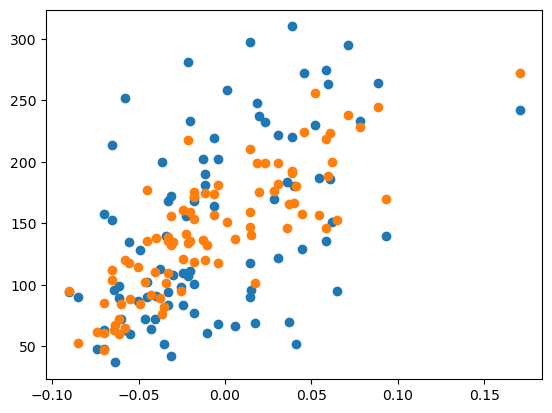

In [60]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

---
# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기


In [65]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기


In [66]:
# 문자열 데이터를 파이썬이 이해할 수 있는 날짜 타입으로 바꿔줍니다.
train['datetime'] = pd.to_datetime(train['datetime'])
# .dt란? datetime 전용 접근자. 날짜/시간 관련 정보는 사용할 수 있다.
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기


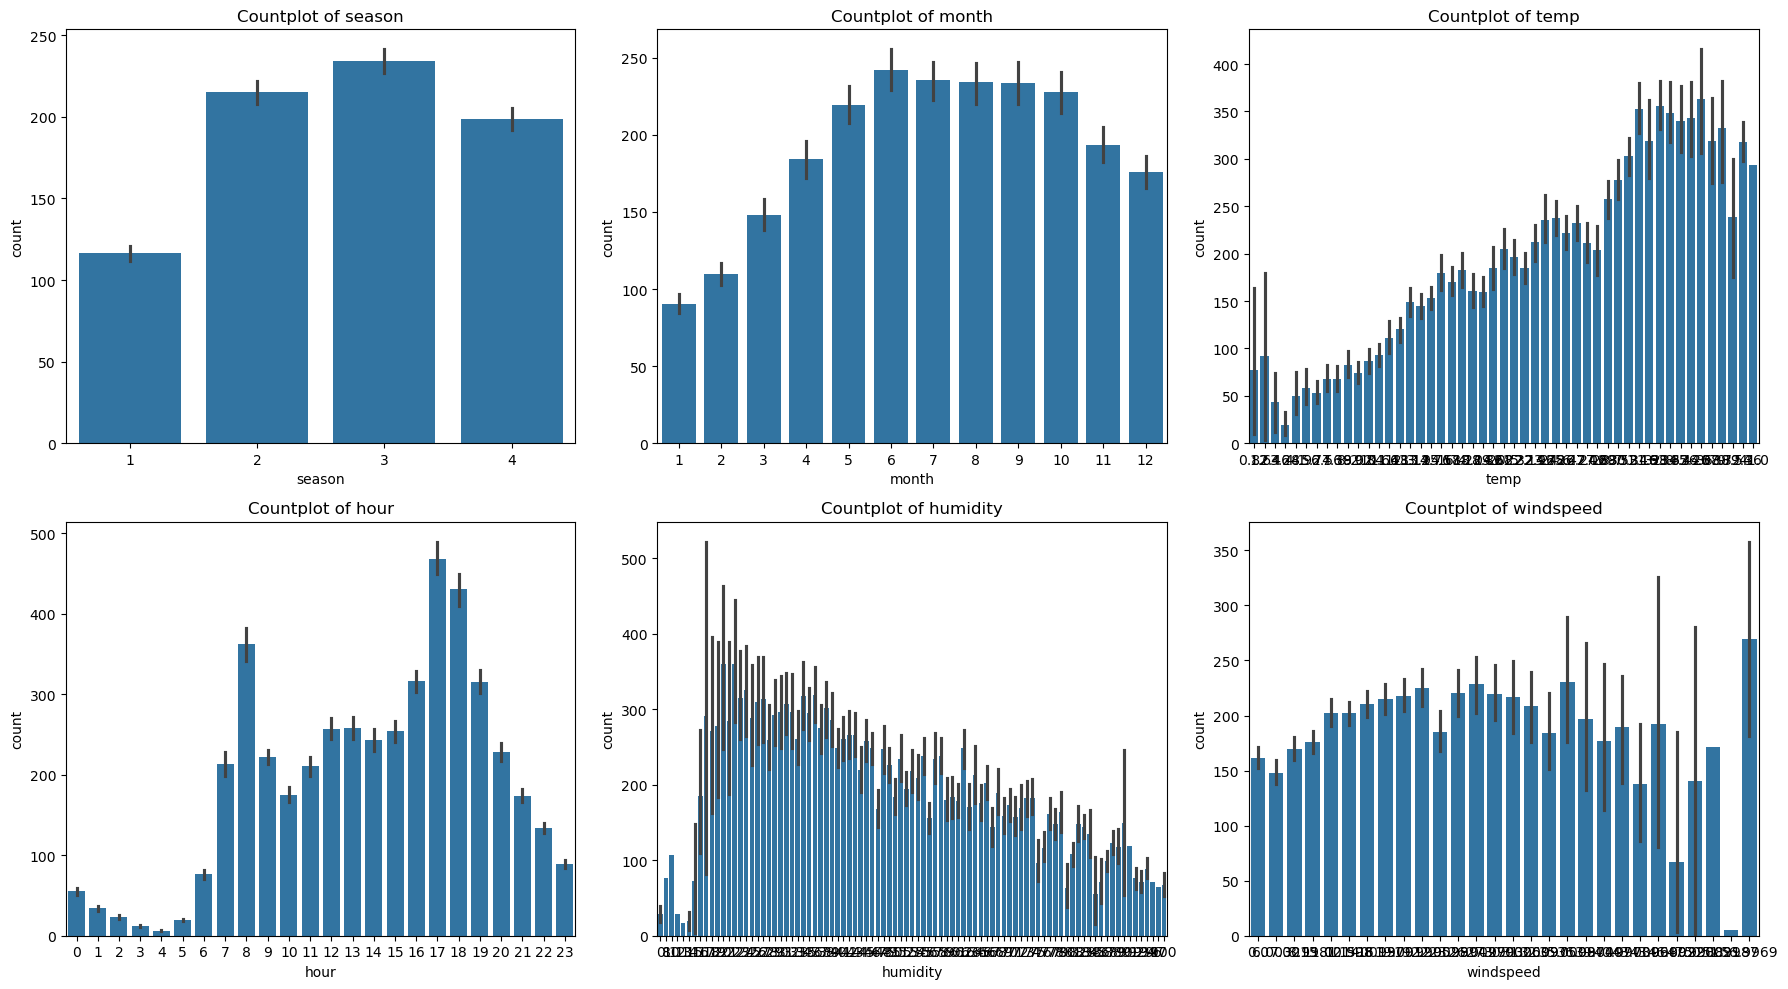

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
# 대여와 관계 없는 데이터 대신 관련 있는 데이터로 교체
cols = ['season', 'month', 'temp', 'hour', 'humidity', 'windspeed']

for ax, col in zip(axs.flatten(), cols):
    sns.barplot(x=col, y='count', data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

## season, weather, month, hour 
## One-hot Encoding

In [69]:
# 원-핫 인코딩 적용할 컬럼 리스트
cols_to_encode = ['season', 'weather', 'month', 'hour']

# pandas의 get_dummies를 사용하여 변환
train = pd.get_dummies(train, columns=cols_to_encode)

# 새로 생성된 컬럼 확인하기
print(train.columns.tolist())

# 0값을 NaN으로 변경한 후, 평균값(mean)으로 채우기
# (또는 median을 사용할 수 있습니다)
windspeed_mean = train['windspeed'].replace(0, np.nan).mean()
train['windspeed'] = train['windspeed'].replace(0, windspeed_mean)

# 확인: 0인 데이터가 남아있는지 체크
print("windspeed가 0인 데이터 개수:", (train['windspeed'] == 0).sum())

['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'day', 'minute', 'second', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']
windspeed가 0인 데이터 개수: 0


In [70]:
# 다시 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   holiday     10886 non-null  int64         
 2   workingday  10886 non-null  int64         
 3   temp        10886 non-null  float64       
 4   atemp       10886 non-null  float64       
 5   humidity    10886 non-null  int64         
 6   windspeed   10886 non-null  float64       
 7   casual      10886 non-null  int64         
 8   registered  10886 non-null  int64         
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int32         
 11  day         10886 non-null  int32         
 12  minute      10886 non-null  int32         
 13  second      10886 non-null  int32         
 14  season_1    10886 non-null  bool          
 15  season_2    10886 non-null  bool          
 16  season_3    10886 non-

## (4) X, y 컬럼 선택 및 train/test 데이터 분리


In [71]:
# features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']

# Ont-hot Encoding으로 늘어난 모든 컬럼을 포함해야 합니다.
# 제외할 컬럼: 정답인 'count', 직접적 연관이 큰 'casual', 'registered', 그리고 분석에 쓰지 않는 'datetime', 'minute', 'second'
exclude_cols = ['count', 'casual', 'registered', 'datetime', 'minute', 'second']
features = [col for col in train.columns if col not in exclude_cols]

X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## (5) LinearRegression 모델 학습


In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산


In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 10053.789435556524
RMSE: 100.26858648428492


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기


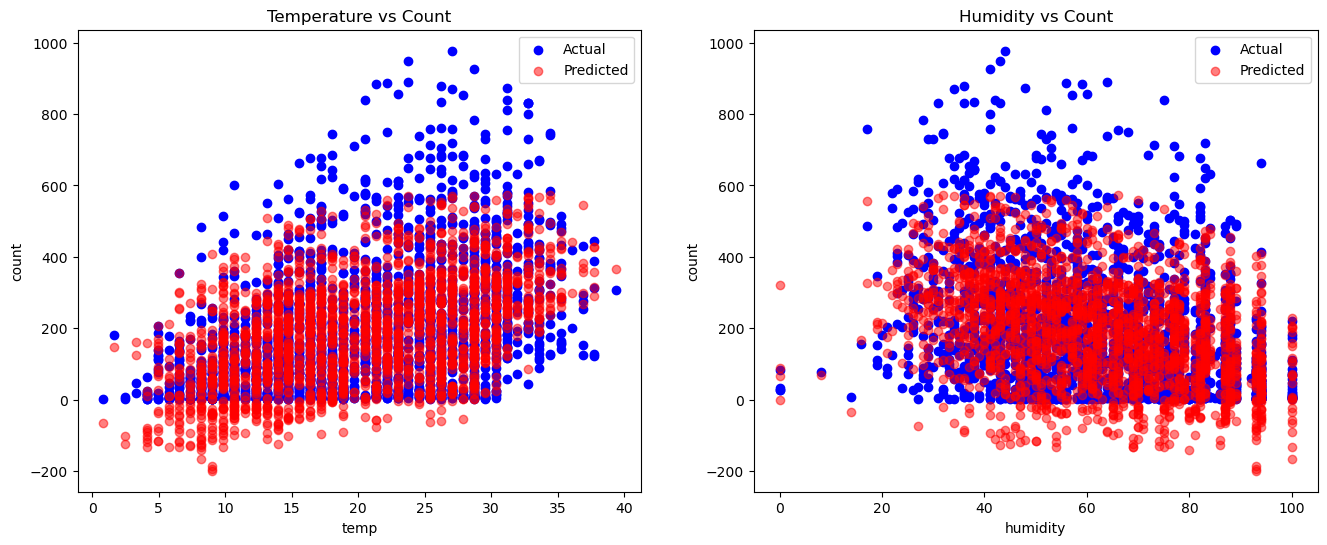

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

- 이번 프로젝트를 하면서 느낀점, 배운점
코드를 하나한 보면서 이해되는것도 안되는것도 있습니다.
최대한 다 알고 지나가고 싶지만 시간이 별도로 많이 필요하다고 느꼈습니다.
미분은 하나도 몰라서 막막했습니다.

- 이번 프로젝트에서 잘 했다고 생각이 드는 점.
최대한 흐름을 읽으면서 무엇을 하는지 목적을 기억하며 학습했습니다.

- 이번 프로젝트에서 느낀 문제점.
수학공부를 어느정도 해야겠다 느꼈고, 관련용어를 배워야겠다고 느꼈습니다.

- 다음에는 이렇게 해야겠다 생각한 점.
여러번 하다보면 빨라지겠지 생각하고 조급하지 않게 해야겠습니다.